<a href="https://colab.research.google.com/github/Psousace/Trading_Dados/blob/main/TD_IBOV_Dolarizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRADING COM DADOS
###IBOV dolarizado
###LINK VIDEO: https://www.youtube.com/watch?v=VIYxNFyajy0&t=1710s

##Importando as bibliotecas

In [ ]:
!pip install yfinance ==quiet

ERROR: Invalid requirement: '==quiet'


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

###Definir periodo

In [ ]:
start_date = '2007-01-01'
end_date = '2023-08-23'

###Extrair e manipular dados

In [ ]:
# obter dados do IBOV e do dólar  em reais.
ibov_data = yf.download('^BVSP', start = start_date, end = end_date)['Close']
usd_brl_date = yf.download('USDBRL=X', start = start_date, end = end_date)['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# transformar de seriespara DataFrame
ibov_df = pd.DataFrame(ibov_data)
ibov_df.columns = ['IBOV']
usd_brl_df = pd.DataFrame(usd_brl_date)
usd_brl_df.columns = ['USDBRL']

In [ ]:
# juntando os DataFrames com Merge
ibov_usd = pd.merge(ibov_df,
                    usd_brl_df,
                    left_index=True,
                    right_index=True,
                    how='inner')
ibov_usd

,IBOV,USDBRL
Date,,
2007-01-02,45383.0,2.1310
2007-01-03,44445.0,2.1345
2007-01-04,44020.0,2.1390
2007-01-05,42245.0,2.1470
2007-01-08,42830.0,2.1465
...,...,...
2023-08-16,115592.0,4.9832
2023-08-17,114982.0,4.9869
2023-08-18,115409.0,4.9755


In [ ]:
# Dividindo o IBOV pelo valor do Dólar para obter ibov dolarizado
ibov_usd['IBOV_USD'] = ibov_usd['IBOV']/ibov_usd['USDBRL']
ibov_usd


,IBOV,USDBRL,IBOV_USD
Date,,,
2007-01-02,45383.0,2.1310,21296.573959
2007-01-03,44445.0,2.1345,20822.206345
2007-01-04,44020.0,2.1390,20579.710732
2007-01-05,42245.0,2.1470,19676.291819
2007-01-08,42830.0,2.1465,19953.411504
...,...,...,...
2023-08-16,115592.0,4.9832,23196.339360
2023-08-17,114982.0,4.9869,23056.809520
2023-08-18,115409.0,4.9755,23195.457245


##Plot

<function matplotlib.pyplot.show(close=None, block=None)>

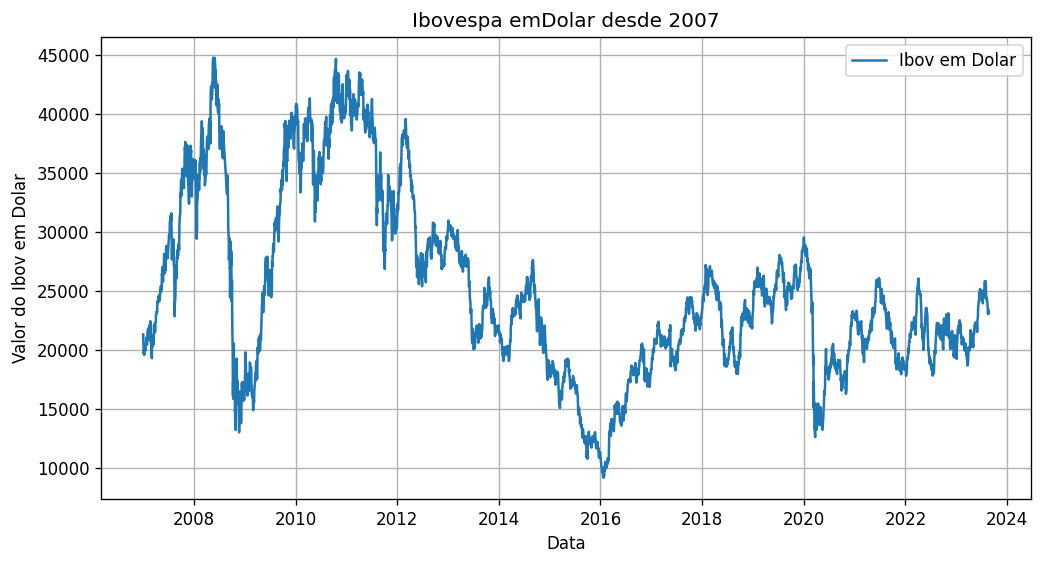

In [ ]:
plt.figure(figsize=(10,5), dpi = 120)
plt.plot(ibov_usd.index, ibov_usd['IBOV_USD'], label='Ibov em Dolar')
plt.xlabel('Data')
plt.ylabel('Valor do Ibov em Dolar')
plt.title('Ibovespa emDolar desde ' + start_date[:4])
plt.legend()
plt.grid(True)
plt.show

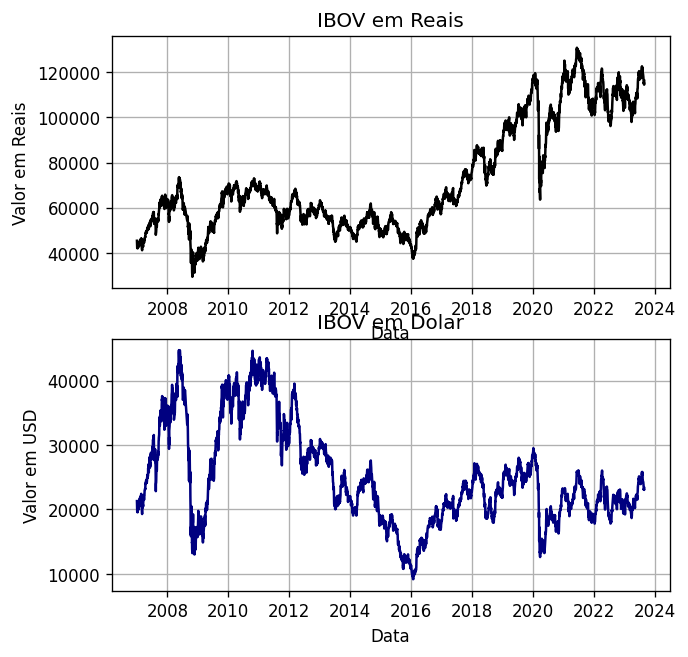

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6), dpi = 120)

# plot do primeiro grafico
ax1.plot(ibov_usd.index, ibov_usd['IBOV'], label= 'IBOV em Reais', color= 'black')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor em Reais')
ax1.set_title('IBOV em Reais')
ax1.grid(True)

# plot do segundo grafico
ax2.plot(ibov_usd.index, ibov_usd['IBOV_USD'], label= 'IBOV em Dolar', color= 'navy')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor em USD')
ax2.set_title('IBOV em Dolar')
ax2.grid(True)

# Ajuste no grafico
plt.tight_layout
plt.show()